In [ ]:
# -*- coding: utf-8 -*-

from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
# print(x_train.size)

In [ ]:
# noise_factor = 0.5
noise_factor = 0.8
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

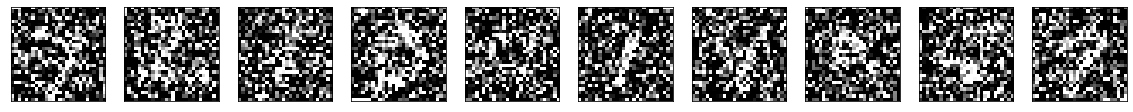

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = Input(shape=(28, 28, 1,)) # N * 28 * 28 * 1

In [ ]:
# Encoding: Input 28 * 28 * 1

x = Conv2D(32, (3, 3), padding='same', activation='relu')(input_img) # 28 * 28 * 32
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # 28 * 28 * 64 
x = MaxPooling2D((2, 2), padding='same')(x) # 14 * 14 * 64

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x) # 14 * 14 * 128
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x) # 14 * 14 * 128
x = MaxPooling2D((2, 2), padding='same')(x) # 7 * 7 * 128

x = Conv2D(256, (3, 3), padding='same', activation='relu')(x) # 7 * 7 * 256
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x) # 7 * 7 * 256
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x) # 7 * 7 * 256
x = MaxPooling2D((2, 2), padding='same')(x) # 4 * 4 * 256

x = Conv2D(512, (3, 3), padding='same', activation='relu')(x) # 4 * 4 * 512
x = Conv2D(512, (3, 3), padding='same', activation='relu')(x) # 4 * 4 * 512
x = Conv2D(512, (3, 3), padding='same', activation='relu')(x) # 4 * 4 * 512
x = MaxPooling2D((2, 1), padding='same')(x) # 2 * 4 * 512

x = Conv2D(512, (3, 3), padding='same', activation='relu')(x) # 2 * 4 * 512
x = Conv2D(512, (3, 3), padding='same', activation='relu')(x) # 2 * 4 * 512
x = Conv2D(512, (3, 3), padding='same', activation='relu')(x) # 2 * 4 * 512
encoded = MaxPooling2D((2, 1), padding='same')(x) # 1 * 4 * 512

print(encoded.shape)


(None, 1, 4, 512)


In [ ]:
# Decoding: Input 1 * 4 * 512

x = Conv2D(512, (3, 3), padding='same', activation='relu')(x) 
x = Conv2D(512, (3, 3), padding='same', activation='relu')(x) 
x = Conv2D(512, (3, 3), padding='same', activation='relu')(x) 
x = UpSampling2D((2, 2))(x) 

x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu')(x) 
x = UpSampling2D((2, 2))(x)

x = Conv2D(256, (3, 3), padding='same', activation='relu')(x) 
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x) 
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x) 
x = UpSampling2D((2, 2))(x) 

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x) 
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x) 
x = UpSampling2D((2, 2))(x) 

x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_img)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)  
x = UpSampling2D((1, 1))(x) # 28 * 28 * 32
decoded = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x) # 28 * 28 * 1

print(decoded.shape)

(None, 28, 28, 1)


In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

autoencoder.save('autoencoder.h5')

Epoch 1/100
469/469 [==============================] - 9s 18ms/step - loss: 0.6966 - val_loss: 0.6879
Epoch 2/100
469/469 [==============================] - 8s 17ms/step - loss: 0.6779 - val_loss: 0.6673
Epoch 3/100
469/469 [==============================] - 8s 17ms/step - loss: 0.6537 - val_loss: 0.6392
Epoch 4/100
469/469 [==============================] - 8s 17ms/step - loss: 0.6193 - val_loss: 0.5987
Epoch 5/100
469/469 [==============================] - 8s 17ms/step - loss: 0.5728 - val_loss: 0.5497
Epoch 6/100
469/469 [==============================] - 8s 17ms/step - loss: 0.5268 - val_loss: 0.5121
Epoch 7/100
469/469 [==============================] - 8s 17ms/step - loss: 0.4980 - val_loss: 0.4928
Epoch 8/100
469/469 [==============================] - 8s 17ms/step - loss: 0.4828 - val_loss: 0.4810
Epoch 9/100
469/469 [==============================] - 8s 17ms/step - loss: 0.4718 - val_loss: 0.4705
Epoch 10/100
469/469 [==============================] - 8s 17ms/step - loss: 0.461

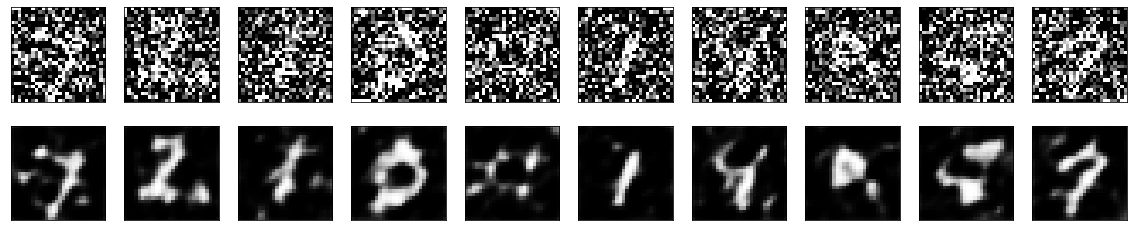

In [ ]:
autoencoder = load_model('autoencoder.h5')

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **Classification**

In [43]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.vgg16 import VGG16


In [51]:
def define_model():
  model = Sequential()

  model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
  model.add(Conv2D(64, 3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2, 2))
  model.add(BatchNormalization())

  model.add(Conv2D(128, 3, activation='relu', padding='same'))
  model.add(Conv2D(128, 3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2, 2))
  model.add(BatchNormalization())

  model.add(Conv2D(256, 3, activation='relu', padding='same'))
  model.add(Conv2D(256, 3, activation='relu', padding='same'))
  model.add(Conv2D(256, 3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2, 2))
  model.add(BatchNormalization())

  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2, 1)) # default stride is 2
  model.add(BatchNormalization())

  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(Conv2D(512, 3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2, 1)) # default stride is 2
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()
 
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()
 
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
	#return trainX, trainY, testX, testY

  # prepare pixel data
  train_norm = trainX.astype('float32')
  test_norm = testX.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  trainX = train_norm
  testX = test_norm


  # define model
  model = define_model()
  
	# fit model
  model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	# save model
  model.save('final_model.h5')

  # load model
  model = load_model('final_model.h5')

  '''
  model = VGG16()
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  '''

	# evaluate model on test dataset
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))

	# evaluate model
  #scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	#summarize_diagnostics(histories)
	# summarize estimated performance
	#summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


> 98.810


In [52]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

from google.colab import files
files.upload()

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample1.png')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	digit = model.predict_classes(img)
	print("The number on the image is ", digit[0])
 
# entry point, run the example
run_example()

Saving sample1.png to sample1 (4).png


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The number on the image is  7
